#Arbol de decisión

In [86]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Cargar Datos

In [ ]:
iris = load_iris()
x= pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [105]:

#Preparacion de datos de entrenaimento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Entrenamiento del modelo

In [121]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
pred_test = clf.predict(x_test)

#Evaluacion

In [123]:
#verficar la pecisión del modelo
acc = accuracy_score(y_test, pred_test)

acc

1.0

In [122]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Visualización

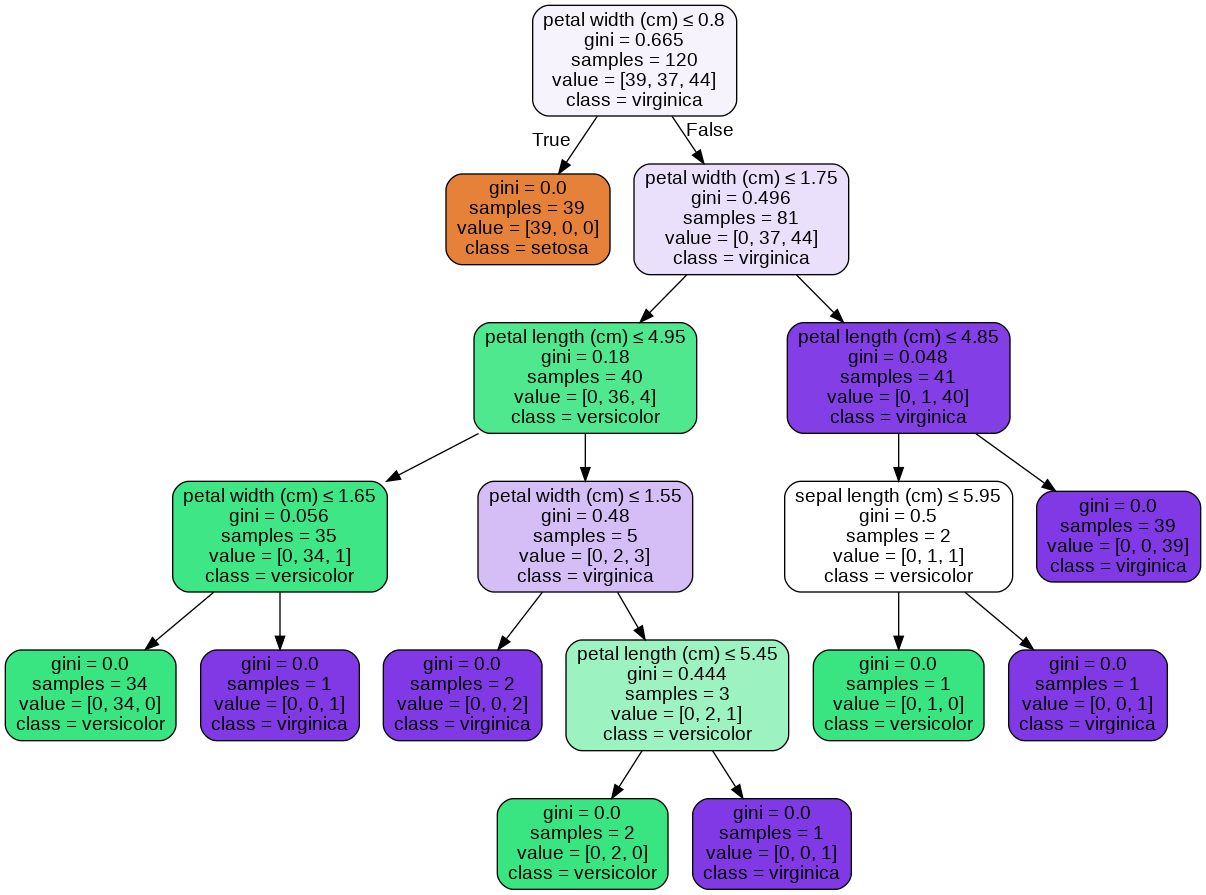

In [124]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol-iris.png')
Image(graph.create_png())